# **Introduction**

In pursuit of expanding its global footprint, Geely Auto, a leading Chinese automobile manufacturer, is embarking on a strategic endeavor to penetrate the highly competitive US automotive market. Recognizing the importance of localized production and keen competition with established US and European counterparts, Geely Auto has initiated plans to establish a manufacturing unit in the United States. However, to effectively position itself and thrive in this new market landscape, Geely Auto understands the critical necessity of comprehensively understanding the determinants of car pricing in the American context. To address this imperative, Geely Auto has engaged the expertise of an esteemed automobile consulting firm. The primary objective of this collaboration is to elucidate the nuanced factors that significantly influence car pricing in the American market, distinct from the dynamics observed in the Chinese automotive market. Specifically, Geely Auto seeks insights into the pivotal variables that play a decisive role in predicting car prices and the extent to which these variables contribute to delineating pricing patterns. Leveraging a robust dataset amassed through exhaustive market surveys and research initiatives, the consulting firm endeavors to provide actionable insights that will empower Geely Auto to formulate informed pricing strategies and enhance its competitive positioning within the American automotive landscape.

# **Problem Statement**
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:
Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.


# **Project Objective:**

The primary objective of this project is to develop a predictive model that effectively models the pricing of cars in the American market, utilizing the available independent variables. This model will serve as a valuable tool for Geely Auto's management to gain insights into the relationship between various factors and car prices. By understanding how these variables influence pricing dynamics, management can make informed decisions regarding car design, business strategies, and pricing strategies to achieve specific price levels. Additionally, the model will facilitate Geely Auto's understanding of pricing dynamics in a new market, aiding in market entry and competitive positioning strategies.

## **Data Dictionary**

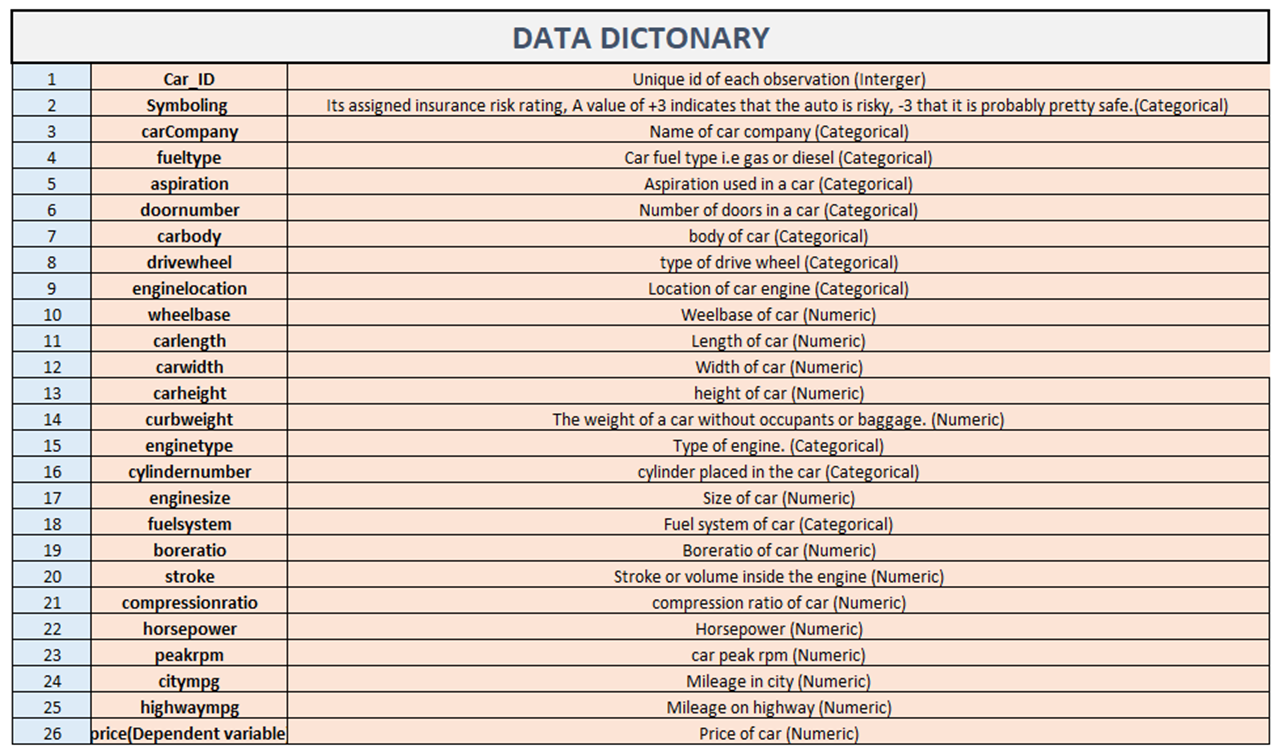

# **Importing libraries**

In [ ]:
import numpy as np
import matplotlib as plt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set()

# Reading the dataset

In [ ]:
df=pd.read_csv("/content/CarPrice_Assignment.csv")
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Understanding the dataset

In [ ]:
#EWxploring the dataset shape
df.shape

(205, 26)

* The dataset contains 205 rows and 26 columns

In [ ]:
# Retrieving the dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

* The data is in the correct datatype

In [ ]:
# Checking for missing values
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [ ]:
#
df.drivewheel.unique()

array(['rwd', 'fwd', '4wd'], dtype=object)

* The dataset is free of null values

In [ ]:
# Calculating the summary metrics
dfless_id=df.drop("car_ID", axis=1)
dfless_id.describe().round(2).style.format(precision=2).background_gradient(cmap="YlGnBu")

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00,205.00
mean,0.83,98.76,174.05,65.91,53.72,2555.57,126.91,3.33,3.26,10.14,104.12,5125.12,25.22,30.75,13276.71
std,1.25,6.02,12.34,2.15,2.44,520.68,41.64,0.27,0.31,3.97,39.54,476.99,6.54,6.89,7988.85
min,-2.00,86.60,141.10,60.30,47.80,1488.00,61.00,2.54,2.07,7.00,48.00,4150.00,13.00,16.00,5118.00
25%,0.00,94.50,166.30,64.10,52.00,2145.00,97.00,3.15,3.11,8.60,70.00,4800.00,19.00,25.00,7788.00
50%,1.00,97.00,173.20,65.50,54.10,2414.00,120.00,3.31,3.29,9.00,95.00,5200.00,24.00,30.00,10295.00
75%,2.00,102.40,183.10,66.90,55.50,2935.00,141.00,3.58,3.41,9.40,116.00,5500.00,30.00,34.00,16503.00
max,3.00,120.90,208.10,72.30,59.80,4066.00,326.00,3.94,4.17,23.00,288.00,6600.00,49.00,54.00,45400.00


# **Eploratory Data Analysis**

In [ ]:
#Displaying the dataset columns
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

## The numerical features correlation

In [ ]:
dfless_id.corr()['price']

<ipython-input-47-3fe1b8c33d60>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dfless_id.corr()['price']


symboling          -0.079978
wheelbase           0.577816
carlength           0.682920
carwidth            0.759325
carheight           0.119336
curbweight          0.835305
enginesize          0.874145
boreratio           0.553173
stroke              0.079443
compressionratio    0.067984
horsepower          0.808139
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
price               1.000000
Name: price, dtype: float64

## Exploring the numerical features correlation using a heatmap

<ipython-input-48-2aaaea4e42b3>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(dfless_id.corr(), cmap='YlGnBu', annot=True)


<Axes: >

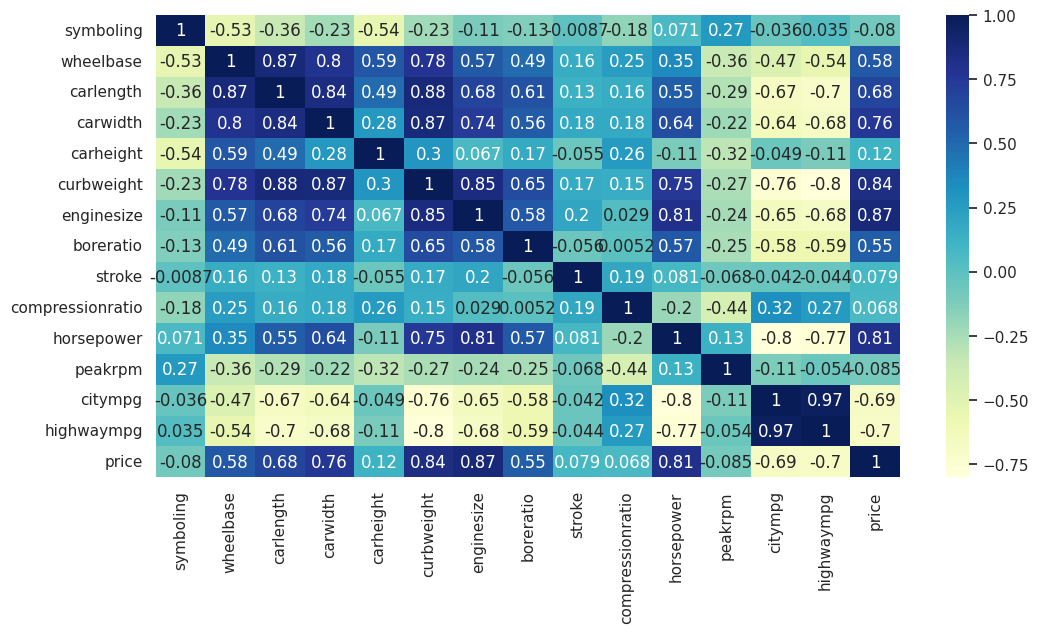

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(dfless_id.corr(), cmap='YlGnBu', annot=True)

* Some features such as "enginesize", "Peakrpm", "horsepower', and "curbweight" are observed to have a very high positive correlation with the price of over 0.8. This implies an increase in the any this features greatly induces an increase in the price of a car.

* The feauture "symboling" is seen to have a very negative correlation with the price, implying an increase in the feature "symboling" induces a reduction in the price of a car. This could be associated by the auto high risk level.
* There are other features that have a very low positive correlation of below 0.1 implying a minimal impact of the price.

## Exoploring the Categorical features in relation to Price

In [ ]:
# Checking the number of unique values is the categorical features
columns_unique_value = ['fuelsystem', 'cylindernumber', 'enginetype','CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation']

for column in columns_unique_value:
    unique_values_count = df[column].nunique()
    print(f"The '{column}' column number of unique values are: {unique_values_count}")
    print("____________________________________________________________________")

The 'fuelsystem' column number of unique values are: 8
____________________________________________________________________
The 'cylindernumber' column number of unique values are: 7
____________________________________________________________________
The 'enginetype' column number of unique values are: 7
____________________________________________________________________
The 'CarName' column number of unique values are: 147
____________________________________________________________________
The 'fueltype' column number of unique values are: 2
____________________________________________________________________
The 'aspiration' column number of unique values are: 2
____________________________________________________________________
The 'doornumber' column number of unique values are: 2
____________________________________________________________________
The 'carbody' column number of unique values are: 5
____________________________________________________________________
The 'drive

## How is the car's price in relation to the fuelsystem?

<ipython-input-50-bc0537a459b8>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = "fuelsystem",  y="price", palette="viridis", data = df)


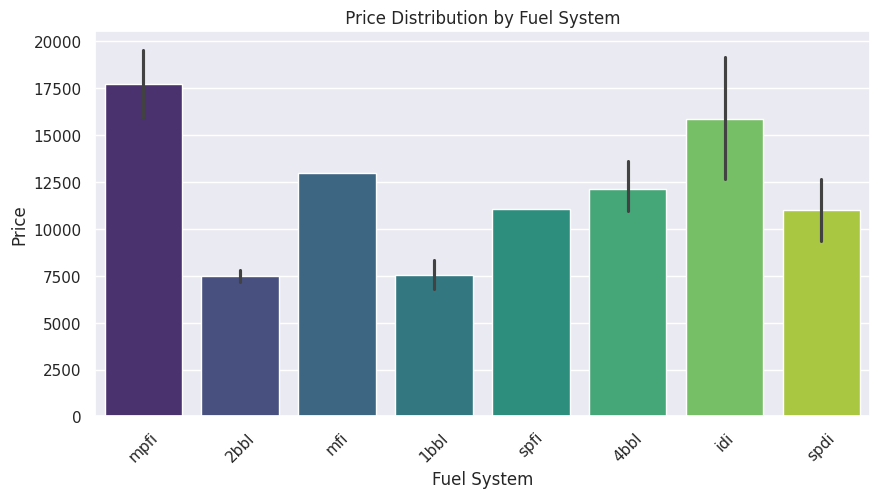

In [ ]:
plt.figure(figsize=(10, 5))
sns.barplot(x = "fuelsystem",  y="price", palette="viridis", data = df)
plt.title(" Price Distribution by Fuel System ")
plt.xlabel("Fuel System")
plt.ylabel("Price")
plt.xticks(rotation=45)
plt.show()

* It is observed that the price of a car is dependent on the fuelsystem.
* The "mpfi" is seen to have a high price as compred with others while "2bbI' have the lowest  car price.

##Car Price based on the Drive Wheel

<ipython-input-51-1547a3ee3f67>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='drivewheel', y='price', palette="BuGn")


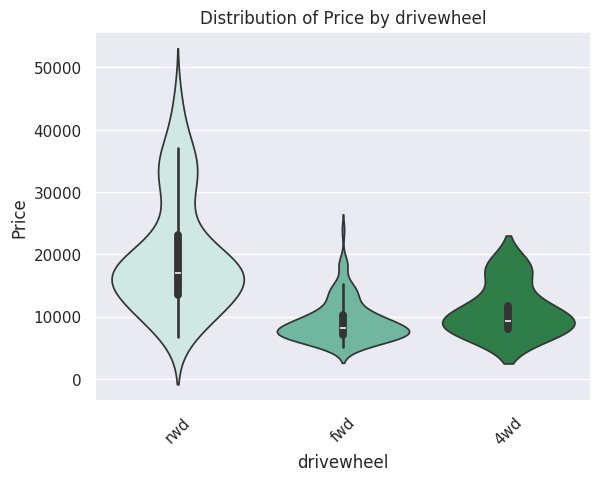

In [ ]:
sns.violinplot(data=df, x='drivewheel', y='price', palette="BuGn")
plt.xticks(rotation=45)  # Rotate the y-axis labels
plt.title("Distribution of Price by drivewheel")
plt.xlabel('drivewheel')
plt.ylabel('Price')
plt.show()



* 'rwd" is observed to have a high price compared to fwd

## How is the price distribution in relation to the Cylindernumber?

Text(0.5, 1.0, 'Price distribution by Cylindernumber ')

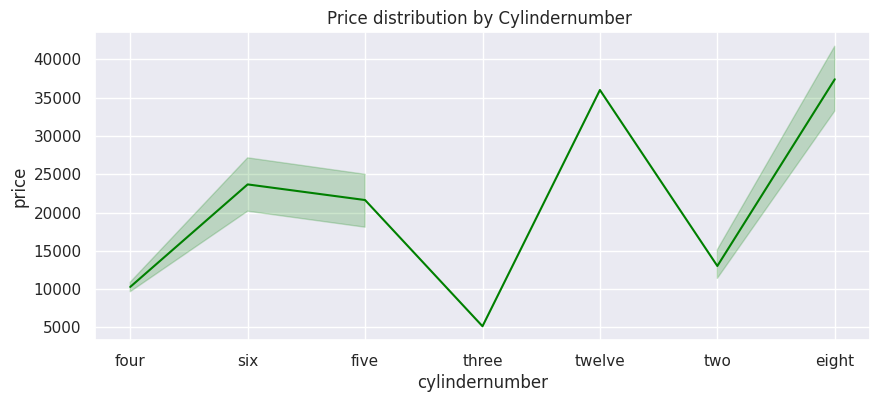

In [ ]:
plt.figure(figsize=(10, 4))
sns.lineplot(data=df, x='cylindernumber', y='price', color="green")
plt.title("Price distribution by Cylindernumber ")

* Upon analysis, it is discerned that automobiles equipped with a greater number of cylinders tend to exhibit higher price points. This finding underscores the significance of engine specifications, particularly cylinder count, in influencing the valuation of vehicles within the automotive market. Such insights contribute to the refinement of pricing strategies and predictive models, aiding stakeholders in making informed decisions regarding pricing and market positioning.

# **Machine Learning**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.metrics import mean_squared_error
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler


## **Feature Engineering**

## Data Enconding

In [ ]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [ ]:
numcol=['symboling', 'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price' ]

In [ ]:
dfencod=dfless_id.drop(numcol, axis=1)

In [ ]:
#Label encoding
le={}
for col in set(dfencod.columns):
  le[col] = LabelEncoder()
  dfless_id[col]  = le[col].fit_transform(dfless_id[col])
dfless_id.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,...,130,5,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,...,152,5,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,...,109,5,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,...,136,5,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
# define features and target:
x= dfless_id.drop("price", axis=1) # Features
y= dfless_id["price"]  # Target


In [ ]:
#spliting the tain and the test data
X_train,X_test,y_train,y_test = train_test_split(x, y,shuffle=True,test_size  = 0.20,random_state = 0)

## Standardization

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# **Regression Model Evaluation**

### Mean Absolute Error for three models

In [ ]:
# Create Regression
knn_regressor = KNeighborsRegressor(n_neighbors=3)
LR_regressor= LinearRegression()
ridge_regressor = Ridge(alpha=0.9)



In [ ]:
ridge_regressor.fit(X_train, y_train)
y_pred =ridge_regressor.predict(X_test)
mse_r = mean_absolute_error(y_test, y_pred)

In [ ]:
LR_regressor.fit(X_train, y_train)
y_pred = LR_regressor.predict(X_test)
mse_lr = mean_absolute_error(y_test, y_pred)

In [ ]:
knn_regressor.fit(X_train, y_train)
predictions = knn_regressor.predict(X_test)
mse_knn = mean_absolute_error(y_test, y_pred)


In [ ]:
print("The  Mean absolute Error Linear Regression is:", mse_lr)
print("The  Mean absolute Error knn Regression  is:", mse_knn)
print("The Mean absolute Error  Ridge Regression  is:", mse_r)

The  Mean absolute Error Linear Regression is: 2530.4076429467877
The  Mean absolute Error knn Regression  is: 2530.4076429467877
The Mean absolute Error  Ridge Regression  is: 2527.9529345223827


### Models performance by using R2_score

In [ ]:
knn_regressor.fit(X_train, y_train)
predictions = knn_regressor.predict(X_test)
mse_knn = r2_score(y_test, y_pred)

ridge_regressor.fit(X_train, y_train)
y_pred =ridge_regressor.predict(X_test)
mse_r = r2_score(y_test, y_pred)

LR_regressor.fit(X_train, y_train)
y_pred = LR_regressor.predict(X_test)
mse_lr = r2_score(y_test, y_pred)


print("The R2_Score for Linear Regression is:", mse_lr)
print("The  R2_Score for knn Regression  is:", mse_knn)
print("The R2_Score for  Ridge Regression  is:", mse_r)

The R2_Score for Linear Regression is: 0.8113230018091973
The  R2_Score for knn Regression  is: 0.8113230018091973
The R2_Score for  Ridge Regression  is: 0.8132513420380163


* The models peformance is high being over 80%

# Linear Regression Model

In [ ]:
# Testing the model perfomance score
LR_regressor.fit(X_train, y_train)
print(f"model score on training data: {LR_regressor.score(X_train, y_train)}")
print(f"model score on testing data: {LR_regressor.score(X_test, y_test)}")

model score on training data: 0.9157845788747837
model score on testing data: 0.8113230018091973


* The model has score of over 80% which explains a significant part of the target

## Making prediction Using Linear Regression Model

In [ ]:
y_pred_test = LR_regressor.predict(X_test)     # predicted value of y_test
y_pred_train =LR_regressor.predict(X_train)    ## predicted value of X_train

print("The top 10 predicted Y_test is: ", y_pred_test[: 10])
print()
print("The top 10 predicted X_train is: ", y_pred_test[: 10])

The top 10 predicted Y_test is:  [ 6066.21443403 16991.49388357 14099.07692262  1690.73764977
  9688.25642169 12981.63154037  7065.22981668  4548.28228167
 20223.97956341  8034.31150557]

The top 10 predicted X_train is:  [ 6066.21443403 16991.49388357 14099.07692262  1690.73764977
  9688.25642169 12981.63154037  7065.22981668  4548.28228167
 20223.97956341  8034.31150557]


## Visualizing the Linear Regression Prediction Model

Text(0.5, 1.0, 'Price Prediction')

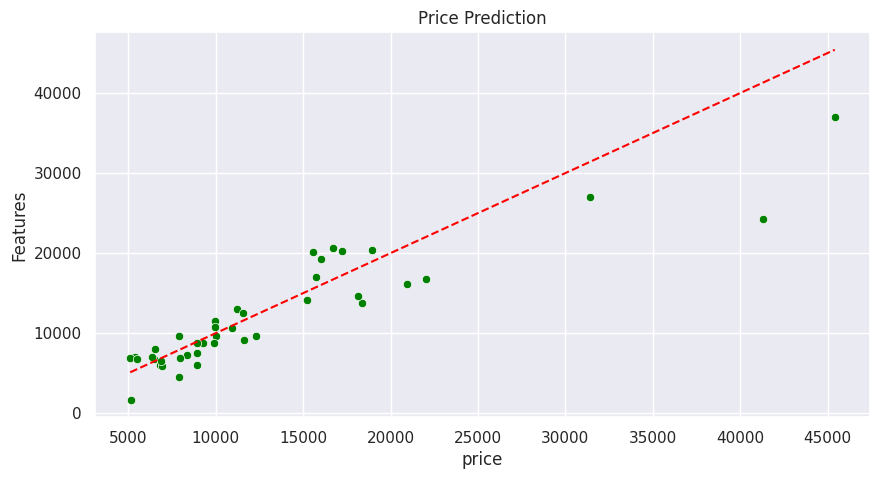

In [ ]:
# visualize it
plt.figure(figsize= (10,5))
sns.scatterplot(x = y_test, y = y_pred, color="green")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], "--", color = "red")
plt.ylabel("Features")
plt.title("Price Prediction")

## Getting the Model coefficients and Feature Importance

In [ ]:
# Regressor coefficients and intercept
print(f'Coefficient: {LR_regressor.coef_}')
print()
print()
print(f'Intercept: {LR_regressor.intercept_}')

Coefficient: [  350.49546313 -1132.55409008  1370.47268865   441.18530841
  -805.24730559  -803.03407522   679.50858611  1834.73560665
  1003.9894741   -438.22001346  1331.55284257   269.06326097
  2080.82331004   150.27270842    66.32923908  2882.97979203
    95.48623497  -546.65413026  -862.43754705  1527.43908485
   494.82487446   615.18783407   174.93868519  -137.17250803]


Intercept: 13304.787603658544


In [ ]:
#Scaling the variance to one
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

model = make_pipeline(StandardScaler(), LR_regressor)

model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

### Quantifying which features are more important in predicting the car price

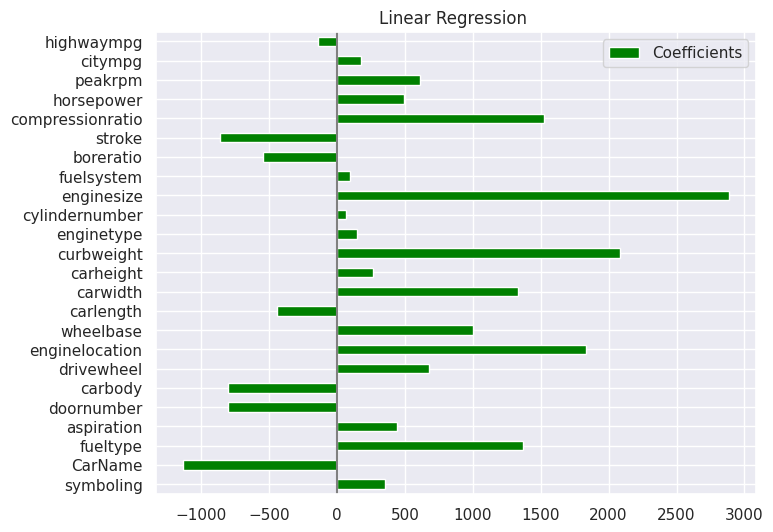

In [ ]:
coefs = pd.DataFrame(
    model[1].coef_, columns=["Coefficients"], index=x.columns
)

coefs.plot(kind="barh", figsize=(10, 6), color="green")
plt.title("Linear Regression ")
plt.axvline(x=0, color=".5")
plt.subplots_adjust(left=0.3)



# **Findings:**

Upon comprehensive analysis, it becomes evident that every feature of a car plays a crucial role in predicting its price within the American market. Factors such as engine size, fuel type, engine location, cylinder count, compression ratio, and various other specifications contribute significantly to the pricing dynamics of automobiles. Through thorough examination of the dataset, it is discerned that each feature exhibits a distinct degree of influence on car prices, reflecting the intricate interplay between technical specifications, market demand, and consumer preferences.

# **Conclusion:**

In conclusion, the findings underscore the multifaceted nature of car pricing in the American market, wherein no single feature operates in isolation. Instead, the collective impact of various features amalgamates to shape the pricing landscape, reflecting the intricate balance between performance, fuel efficiency, design aesthetics, and brand perception. As Geely Auto endeavors to penetrate and compete within this dynamic market, a holistic understanding of these pricing determinants becomes imperative. By leveraging insights gleaned from this analysis, Geely Auto can tailor its product offerings, marketing strategies, and pricing tactics to align with consumer preferences and market trends, thereby enhancing its competitiveness and fostering sustainable growth in the American automotive sector.